## Porównywanie obrazów przy pomocy histogramów

Napisz metodę, która porównuje dwa obrazy przy pomocy histogramów. Metoda powinna zwracać wartość z zakresu [0, b] gdzie 0 < b. Im mniejsza wartość tym bardziej podobne histogramy, a co za tym idzie, istnieje duża szansa, że dwa obrazy są podobne albo identyczne.

Uwaga: Możesz zmodyfikować jedynie metodę `compare_histograms`.

In [19]:
import numpy as np
from skimage import data 

img1 = data.camera()
img2 = data.coins()
img3 = np.roll(img1, (4, 4))
img4 = np.rot90(img1)
img5 = np.flip(img1, axis=0)
img6 = np.flip(img1, axis=1)
img7 = np.clip(img1 + np.random.randint(-50, 50, img1.shape), 0, 255).astype(np.uint8)

def compare_histogram(x: np.ndarray, y: np.ndarray, bins: int = 256) -> float:
    x_hist = np.histogram(x,bins = bins)[0]
    y_hist = np.histogram(y,bins = bins)[0]
    return np.sum(np.abs(x_hist - y_hist))
    # umieść swoje rozwiązanie tutaj
    
assert compare_histogram(img1, img2) > 0
assert compare_histogram(img1, img3) == 0
assert compare_histogram(img1, img4) == 0
assert compare_histogram(img1, img5) == 0
assert compare_histogram(img1, img6) == 0
assert compare_histogram(img1, img7) > 0


## Dopasowywanie histogramu
Dokonaj dopasowywanie histogramu za pomocą funkcji `match_histograms`. 

Wyświetl obraz oryginalny, obraz referencyjny oraz obraz po dopasowaniu histogramu.

Ustaw rozmiar figury: 12x4. 

Wykorzystaj `tight_layout`.

Ustaw czcionkę na `cursive`.

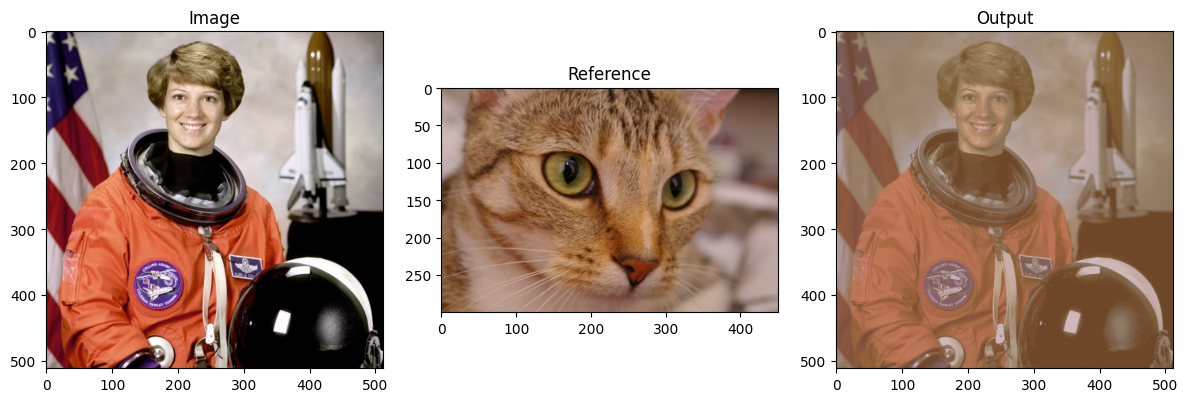

In [20]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import match_histograms

reference = data.chelsea()
image = data.astronaut()

plt.subplots(1,3,figsize = (12,4))
plt.subplot(1,3,1).set_title("Image")
plt.imshow(image)
plt.subplot(1,3,2).set_title("Reference")
plt.imshow(reference)
plt.subplot(1,3,3).set_title("Output")
new_img = match_histograms(image, reference, channel_axis=-1)
plt.imshow(new_img)
plt.tight_layout()
plt.show()
# umieść swoje rozwiązanie tutaj


## Wyrównywanie histogramu w oknach

Napisz metodę, która wyrównuje histogram obrazu w oknach o rozmiarze `window_size`.

Pamiętaj o zakresie wartości pikseli w obrazie - [0, 255] vs. [0, 1].

512   512


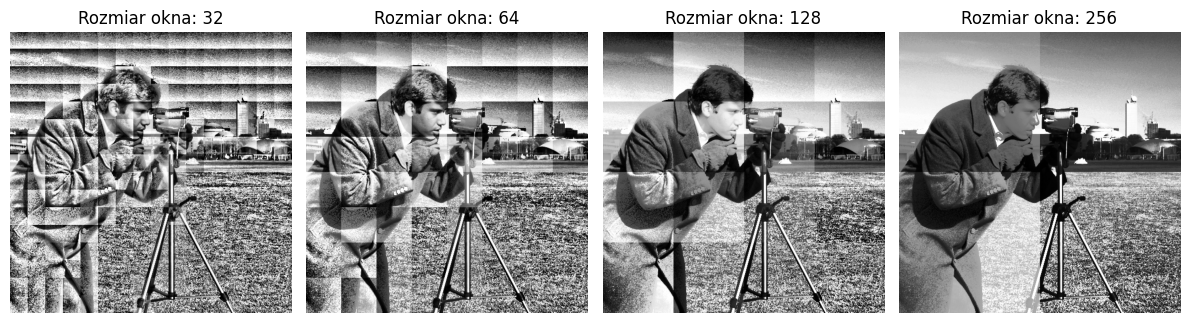

In [31]:
from typing import List
import numpy as np
from skimage import data 
from skimage.exposure import equalize_hist
import matplotlib.pyplot as plt

def equalize_hist_in_windows(img: np.ndarray, window_size: int, bins: int = 256) -> np.ndarray:
    windows = img.shape[0]//window_size
    new_image = np.zeros(img.shape)
    for i in range(windows):
        for j in range(windows):
            window = img[i*window_size:i*window_size+window_size,j*window_size:j*window_size+window_size]
            new_image[i*window_size:i*window_size+window_size,j*window_size:j*window_size+window_size] = equalize_hist(window) * 255
    return new_image
    
images: List[np.ndarray] = []
window_sizes = [32, 64, 128, 256]
for window_size in window_sizes:
    img = equalize_hist_in_windows(data.camera(), window_size)
    images.append(img)
print(data.camera().shape[0], " ", data.camera().shape[1])
plt.subplots(1, 4, figsize=(12, 4))
for i, (img, window_size) in enumerate(zip(images, window_sizes)):
    plt.subplot(1, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Rozmiar okna: {window_size}')
plt.tight_layout()
plt.show()
